# Model Training with Decision Tree

## Import Dependency

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

import sys
import os
sys.path.append(os.path.abspath('../..'))
from utils import array_utils

## Import Processed Dataset

In [2]:
url = '../../datasets/processed/processed.csv'
processed_df = pd.read_csv(url, low_memory=False)

## Data Splitting

In [3]:
processed_df.head(2)

,Good Player,Value (€),Potential Value,Wage (€),Best Overall Rating,Release Clause (€),Reactions,International Reputation,Potential,Potential Normalized
0,1,4.410448,4.672397,4.30677,2.845952,5.822134,3.009316,3.777075,2.530017,2.530017
1,1,4.410448,4.839821,4.30677,3.004658,15.195951,3.009316,3.777075,3.014940,3.014940


In [4]:
label = processed_df['Good Player']
feature = processed_df[array_utils.subtract(processed_df.columns, ['Good Player'])]

feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size=0.2, random_state=42)

## Initial Model Training

### Train Model

In [5]:
decision_tree_model = DecisionTreeClassifier(random_state=42)

decision_tree_model.fit(feature_train, label_train)

DecisionTreeClassifier(random_state=42)

### Hyperparameter Tuning

In [20]:
# TODO: Tune hyperparameter

### Test Model

In [6]:
label_predicted = decision_tree_model.predict(feature_test)

### Interpret Model

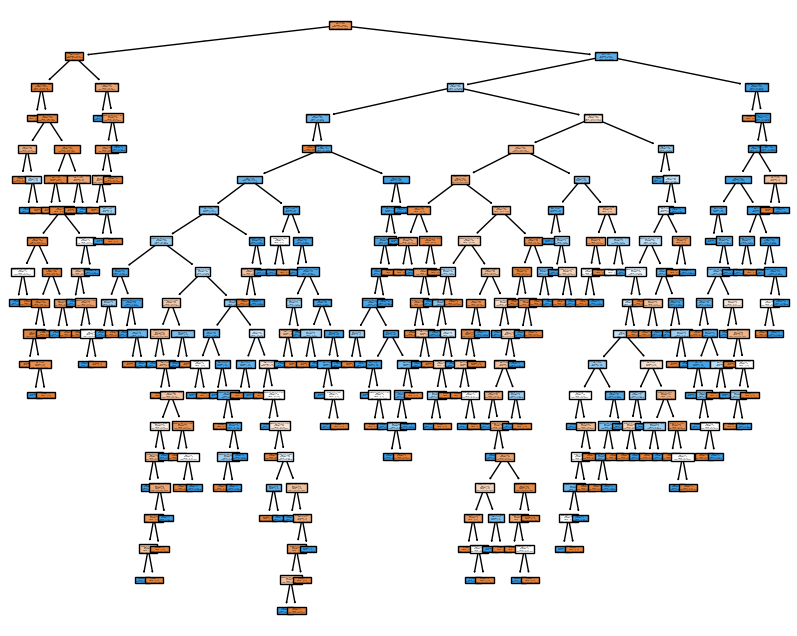

In [7]:
# NOTE: Uncomment to visualize the decision tree
plt.figure(figsize=(10, 8))
plot_tree(decision_tree_model, feature_names=array_utils.subtract(processed_df.columns, ['Good Player']), class_names=['Not Good Player', 'Good Player'], filled=True)
plt.show()

## Model Evaluation

In [8]:
accuracy = accuracy_score(label_test, label_predicted)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9839275277615429


In [9]:
f1_score = f1_score(label_test, label_predicted)
print(f'F1 score: {f1_score}')

F1 score: 0.9398907103825137


In [10]:
cm = confusion_matrix(label_test, label_predicted)
print(f'Confusion Matrix:\n{cm}')

Confusion Matrix:
[[2937   29]
 [  26  430]]


In [11]:
report = classification_report(label_test, label_predicted)
print(f'Classification Report:\n{report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2966
           1       0.94      0.94      0.94       456

    accuracy                           0.98      3422
   macro avg       0.96      0.97      0.97      3422
weighted avg       0.98      0.98      0.98      3422



### Learning Curve Analysis

In [12]:
# TODO: Plot model performance

## Model Iteration

In [13]:
# TODO: Refine the model based on evaluation results and repeat the training if necessary